<a href="https://colab.research.google.com/github/AishwaryaMuchandi/B.E-Project/blob/master/final_Alex_net_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [0]:
!ls german-traffic-signs/

signnames.csv  test.p  train.p	valid.p


In [0]:
!pip install tensorflow==1.14.0
!pip install keras==2.2.0
import tensorflow as tf
print(tf.__version__)


  Using cached https://files.pythonhosted.org/packages/28/6a/8c1f62c37212d9fc441a7e26736df51ce6f0e38455816445471f10da4f0a/Keras_Preprocessing-1.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
ERROR: keras 2.2.0 has requirement keras-applications==1.0.2, but you'll have keras-applications 1.0.8 which is incompatible.
ERROR: keras 2.2.0 has requirement keras-preprocessing==1.0.1, but you'll have keras-preprocessing 1.1.0 which is incompatible.
  Found existing installation: Keras-Preprocessing 1.0.1
    Uninstalling Keras-Preprocessing-1.0.1:
      Successfully uninstalled Keras-Preprocessing-1.0.1
  Found existing installation: Keras-Applications 1.0.2
    Uninstalling Keras-Applications-1.0.2:
      Successfully uninstalled Keras-Applications-1.0.2


  Using cached https://files.pythonhosted.org/packages/e2/60/c557075e586e968d7a9c314aa38c236b37cb3ee6b37e8d57152b1a5e0b47/Keras_Applications-1.0.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f8/33/275506afe1d96b221f66f95adba94d1b73f6b6087cfb6132a5655b6fe338/Keras_Preprocessing-1.0.1-py2.py3-none-any.whl
ERROR: tensorflow 1.14.0 has requirement keras-applications>=1.0.6, but you'll have keras-applications 1.0.2 which is incompatible.
ERROR: tensorflow 1.14.0 has requirement keras-preprocessing>=1.0.5, but you'll have keras-preprocessing 1.0.1 which is incompatible.
  Found existing installation: Keras-Applications 1.0.8
    Uninstalling Keras-Applications-1.0.8:
      Successfully uninstalled Keras-Applications-1.0.8
  Found existing installation: Keras-Preprocessing 1.1.0
    Uninstalling Keras-Preprocessing-1.1.0:
      Successfully uninstalled Keras-Preprocessing-1.1.0


1.14.0


In [0]:
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import pandas as pd 
import os
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from PIL import Image
from sklearn.model_selection import train_test_split
import pickle,random
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D

from keras.layers import  Dense,Dropout,Activation,Flatten

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [0]:
# TODO: Implement load the data here.
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)
# TODO: Load test data
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [0]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

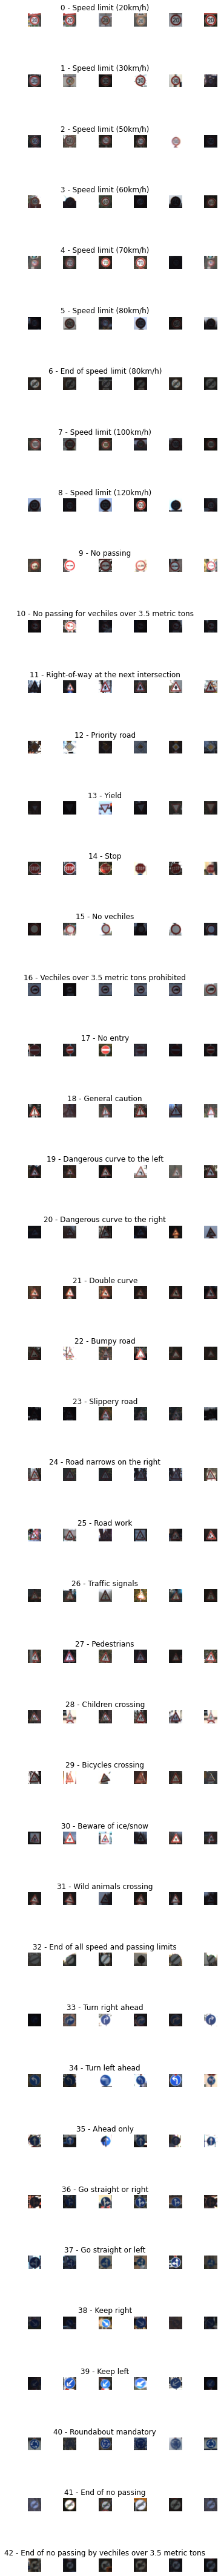

In [0]:
data=pd.read_csv('german-traffic-signs/signnames.csv')
num_of_samples=[]

cols = 6
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,60))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j) + " - " + row["SignName"])
        num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


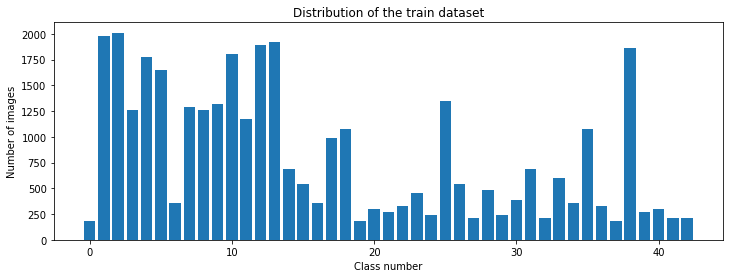

In [0]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


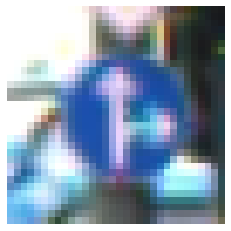

In [0]:
import cv2
plt.imshow(X_train[1020])
plt.axis('off')
print(X_train[1000].shape)
print(y_train[1000])


In [0]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

(32, 32)


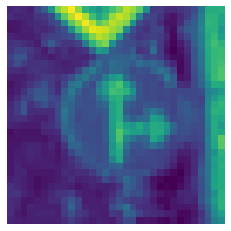

In [0]:
img=grayscale(X_train[1000])
plt.imshow(img)
plt.axis('off')
print(img.shape)

In [0]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img

(32, 32)


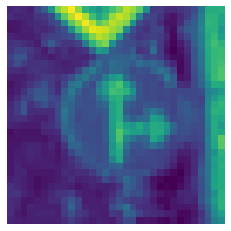

In [0]:
img=grayscale(X_train[1000])
plt.imshow(img)
plt.axis('off')
print(img.shape)

In [0]:
def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img
X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))

(34799, 32, 32)


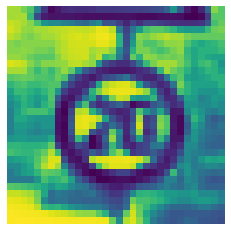

In [0]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

In [0]:
X_train=im.resize(227,227,3)

NameError: ignored

In [0]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)

In [0]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)
y_val=to_categorical(y_val,43)


In [0]:
l2_reg=0

def create_model():
  model=Sequential()

  model.add(Conv2D(96,(11,11),input_shape=X_train.shape[1:],padding='same',strides=(4,4),kernel_regularizer=l2(l2_reg)))
  model.add(BatchNormalization(axis=-1))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))

  model.add(ZeroPadding2D(padding=(2,2),data_format="channels_last"))
  model.add(Conv2D(256,(5,5),padding='same',strides=(1,1))) 
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(3,3),))


  model.add(ZeroPadding2D(padding=(1,1)))
  model.add(Conv2D(512,(3,3),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))


  model.add(ZeroPadding2D(padding=(1,1)))
  model.add(Conv2D(1024,(3,3),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))


 # model.add(ZeroPadding2D(padding=(1,1)))
  model.add(Conv2D(1024,(3,3),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())


  model.add(Dense(3072))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))


  model.add(Dense(4096))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))

  model.add(Dense(num_classes))
  model.add(BatchNormalization())
  model.add(Activation('softmax'))
  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model


In [0]:
model=create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 8, 8, 96)          11712     
_________________________________________________________________
batch_normalization_91 (Batc (None, 8, 8, 96)          384       
_________________________________________________________________
activation_91 (Activation)   (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 7, 7, 96)          0         
_________________________________________________________________
zero_padding2d_35 (ZeroPaddi (None, 11, 11, 96)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 11, 11, 256)       614656    
_________________________________________________________________
batch_normalization_92 (Batc (None, 11, 11, 256)       1024      
__________

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50),
                            steps_per_epoch=2000,
                            epochs=10,
                            validation_data=(X_val, y_val), shuffle = 1)

In [0]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50),
                            epochs=10, verbose = 1,steps_per_epoch=1000,
                            validation_data=(X_val, y_val), shuffle = 1)

Epoch 1/10
  80/1000 [=>............................] - ETA: 2:51:44 - loss: 3.6173 - acc: 0.0995

KeyboardInterrupt: ignored

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')


In [0]:
score = model.evaluate(X_test, y_test, verbose=0)

In [0]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [0]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [0]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)

print("predicted sign: "+ str(model.predict_classes(img)))